In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

!nvidia-smi

Tue Jun 11 20:10:00 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:19:00.0 Off |                  Off |
| 32%   47C    P8             38W /  450W |      11MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler, DPMSolverSDEScheduler

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
                                                torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
pipe.scheduler = DPMSolverSDEScheduler.from_config(pipe.scheduler.config)

pipe.load_lora_weights('/data/sd-results/jisoo_lora_db/jisoo_lora_db.safetensors', adapter_name="jisoo")
pipe.set_adapters(["jisoo"], [0.7])

print('done')

done


100%|███████████████████████████████████████████| 20/20 [00:11<00:00,  1.80it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


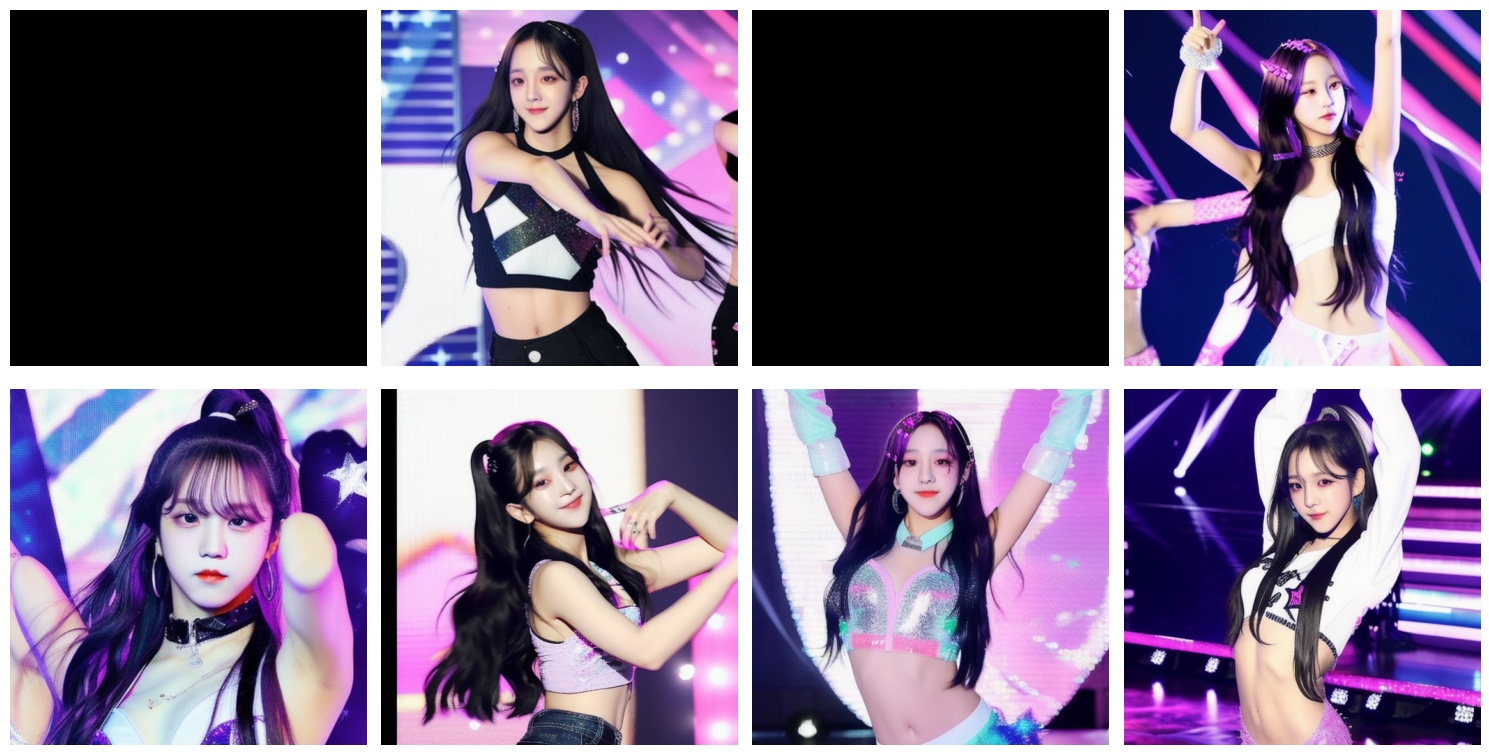

In [41]:
prompt = "jisoo, a K-pop star, dancer"

images = pipe(prompt=prompt,
         height=512,
         width=512,
         num_inference_steps=20,
         guidance_scale=7,
         num_images_per_prompt=8
        ).images


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
